In [1]:
import PIL.Image as image
import cv2
import numpy as np


def dec2bin (x):
    # x = str(x)
    return int(bin(x)[2:])


def bin2dec (x):
    x = str(x)
    return int(x,2)


# set lenght of binner s to 8 bit, if s less than 8 bit then add zeros infront of s
def set8bit (s):
    n = len(str(s))
    if n>=8:
        return s
    less = 8-n
    zeros = ''
    for i in range(less):
        zeros = zeros + '0'
    return str(zeros+str(s))


# arg s: string
# arg n: lenght of sliced
def sliced (s, n):
    result = [s[0+i:n+i] for i in range(0, len(s), n)]
    # if last sliced lenght less than n, then add zeros to last sliced until the lenght equal with n
    if len(result[-1]) < n:
        less = n-len(result[-1])
        zeros = ''
        for i in range(less):
            zeros = zeros + '0'
        result[-1] = result[-1]+zeros
    return result

# arg l is list
# remove list element that value < 0 or > 255
def remove_out_of_domain (l):
    new_list = l.copy()
    for i in range(len(l)):
        if l[i] > 255 or l[i] < 0:
            new_list.remove(l[i])
    return new_list


# arg list is list of int
# arg value is int
def nearest (list, value):
    list = remove_out_of_domain(list)
    array = np.asarray(list)

    # find index of nearest list to value
    i = (np.abs(array-value)).argmin()
    return array[i]


def lsb (target, data):
    # convert to string
    s1 = str(target)
    s2 = str(data)

    # check if data can't insert in target
    if len(s2)>len(s1):
        return target

    # lenght of data to insert
    n = len(s2)

    # slice a target
    s1 = s1[:-n]
    return s1+s2


# arg s is string that contain lsb
# arg n : lenght of lsb
def get_lsb (s, n):
    return str(s[-n:])

# arg target is a binnary number
# data is a binary number
def optimal_lsb (target, data):
    p = bin2dec(target)
    k = len(str(data))
    p_i = lsb(target, data)

    # Calculate value of Pi, Pi+, Pi-
    pi = bin2dec(p_i)
    p_pls = pi + 2**k
    p_neg = pi - 2**k
    return nearest([pi, p_pls, p_neg], p)
    # print(pi, p_pls, p_neg)
    # Find the Pi''
    #     if (abs(p-pi) <= abs(p-p_neg) <= abs(p-p_pls)) and (pi>=0 and pi<=255):
    #         return pi
    #     elif (abs(p-p_pls) <= abs(p-pi) <= abs(p-p_neg)) and (p_pls>=0 and p_pls<=255):
    #         return p_pls
    #     elif (abs(p-p_neg) <= abs(p-pi) <= abs(p-p_pls)) and (p_neg>=0 and p_neg<=255):
    #         return p_neg


# arg filename is string with image extension (ex. 'graybird.png'), just for grayscale image
# arg s is a string
def embed_str (filename, s):
    list_data = sliced(s, 3)

    image_target = image.open(filename).convert('L')
    image_array = np.array(image_target)

    image_array.shape
    index = 0

    new_image_array = image_array.copy()

    for i in range(len(image_array)):
        for j in range(len(image_array[0])):
            # print(index, list_data[index])
            new_image_array[i,j] = optimal_lsb(dec2bin(image_array[i,j]), list_data[index])
            if (index >= len(list_data)-1):
                break
            index = index+1
    return new_image_array


# arg filename is string with image extension (ex. 'graybird.png'), just for grayscale image
# arg n : lenght of lsb
def lsb_from_image (filename, n):
    list_lsb = []
    image_target = image.open(filename).convert('L')
    image_array = np.array(image_target)

    for i in range(len(image_array)):
        for j in range(len(image_array[0])):
            binn = set8bit(dec2bin(image_array[i,j]))
            value = get_lsb(str(binn), n)
            list_lsb.append(str(value))
    return list_lsb

def lsb_from_array (arr, n):
    list_lsb = []
    image_array = arr
    for i in range(len(image_array)):
        for j in range(len(image_array[0])):
            binn = set8bit(dec2bin(image_array[i,j]))
            value = get_lsb(str(binn), n)
            list_lsb.append(str(value))
    return list_lsb

def lsb_from_list_bin (l, n):
    result = []
    for i in l:
        i = set8bit(i)
        value = get_lsb(i, n)
        result.append(str(value))
    return result



# arg filename is string with image extension (ex. 'graybird.png'), just for grayscale image
def img2str (filename):
    img = image.open(filename).convert('L')
    arr = np.array(img)
    s = ''
    for i in range(len(arr)):
        for j in range(len(arr[0])):
            bi = set8bit(dec2bin(arr[i,j]))
            s = s+str(bi)
    return s


# arg filename is string with text file extension (ex. 'test.txt'), all newline are removed
def file2str (filename):
    return open(filename,"r").read().replace('\n','')


# arg filename is string with text file extension (ex. 'test.txt'), arg s is a string
def str2file (filename, s):
    # W = write new file, a='append existing file, new file if file does not exist'
    f = open(filename,"w")
    print(s, file=f)
    f.close()

    
# arg filename is string with image extension (ex. 'graybird.png')
def img_save(filename, arr):
    img = image.fromarray(arr)
    img.save(filename)

def img2list_bin (filename):
    img = image.open(filename)
    arr = np.array(img)
    result = []
    for i in range(len(arr)):
        for j in range(len(arr[0])):
            value = set8bit(dec2bin(arr[i,j]))
            result.append(str(value))
            # print(type(result[i*len(arr)+j]))
    return result

def stego (list_of_image, list_of_lsb):
    m = list_of_image
    lsb = list_of_lsb
    # k = len(str(lsb[0]))
    len_lsb = len(lsb)
    len_m = len(m)
    for i in range(len_m):
        if i < len_lsb:
            m[i] = optimal_lsb(m[i], lsb[i])
        else:
            m[i] = bin2dec(m[i])
    return m

def list2bin (l):
    for i in range(len(l)):
        # print(type(l[i]))
        value = set8bit(dec2bin(l[i]))
        l[i] = str(value)
    return l

def printlist (l):
    s = ''
    for i in l:
        s = s + ' ' +str(i)
    print(s)    
    
# convert list to string
def list2str(l):
    s = ''
    for i in range(len(l)):
        s = s + str(l[i])
    return s


# convert array 2 dimension to list
# return as binnary 
def array2list(arr):
    l = []
    for i in range(len(arr)):
        for j in range(len(arr[0])):
            binn = dec2bin(arr[i,j])
            binn = set8bit(binn)
            l.append(str(binn))
    return l


# arg l is list of binnary number that represented an image
# arg dim is a list that describe the dimension of image we make, (ex. dim=[100, 200]) for grayscale image with high=100 and width=200
def list2img(l, dim):
    #set dimension of image
    if len(dim)==1:
        high = dim[0]
        width = dim[0]
    else:
        high = dim[0]
        width = dim[1]
    
    # if list not 8 bit, convert it to 8 bit by list2str() and sliced(list, 8)
    if len(l[0]) != 8:
        string = list2str(l)
        l = sliced(string, 8)
        
    m = np.zeros([high, width], dtype=np.uint8)
    # if lenght of list not enough to make image with dimension=dim, just return black image
    if len(l) < (high*width):
        print('len not enough')
        return image.fromarray(m)
    
    index = 0
    for i in range(high):
        for j in range(width):
            dec = bin2dec(l[index])
            index = index + 1
            m[i,j] = dec
    img = image.fromarray(m)
    return img

def compare_diff_of_list(l1, l2):
    if len(l1) != len(l2):
        print('Lenght not match')
        return
    count = 0
    for i in range(len(l1)):
        if l1[i] != l2[i]:
            print( i, ', ', l1[i], l2[i])
            count = count + 1
    print('Total : ', count, ' different value')
 


In [122]:
n = len(str_lsb)
compare_diff_of_list(str_lsb, list_lsb[:n])

Total :  0  different value


# Optimal LSB

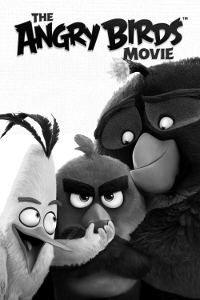

In [5]:
img_filename = 'graybird.png'
img_data_filename = 'red.png'
img_result_filename = 'gray1.png'
img_high = 300
img_width = 200
img_data_high = 100
img_data_widht = 100
len_of_lsb = 3


list_bin_of_img = img2list_bin(img_filename)
list_bin_of_data = sliced(img2str(img_data_filename),len_of_lsb)
new_list_img = stego(list_bin_of_img, list_bin_of_data)
new_list_bin = list2bin(new_list_img)

img_result = list2img(new_list_bin, [img_high, img_width])
img_result.save(img_result_filename)

list_lsb = lsb_from_image(img_result_filename, len_of_lsb)
# show list_lsb as image
lsb_img = list2img(list_lsb, [img_data_high, img_data_widht])
lsb_img 

# show image result
res_img = list2img(new_list_bin, [img_high, img_width])
res_img

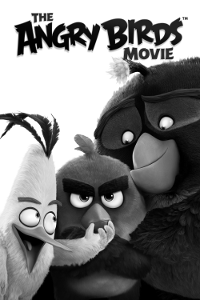

In [7]:
# show the original image
image.open('graybird.png')

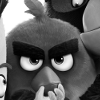

In [6]:
# extract LSB and show as image
x = lsb_from_list_bin(list_bin_of_img,3)
list2img(x, [100])

In [ ]:
## Print LSB that lenght is not 3

In [ ]:
# lsb_image(rs, 3)
# len(lsb_image(rs, 3))

list_lsb = lsb_image(rs, 3)
cnt = 0
for i in range(len(list_lsb)):
    if len(list_lsb[i]) != 3:
        print(i, list_lsb[i])
        cnt = cnt + 1
print('Total : ', cnt)

In [ ]:
c = array2list(rs)
ix = [10, 187, 88, 386, 485, 585, 676, 683, 684]
for i in range(1200):
    print(i, ori_bin[i], res_bin[i], type(res_bin[i]))

In [ ]:
for i in range(len(list_lsb)):
    if list_lsb[i] != '000':
        print(i, list_lsb[i], bin2dec(list_lsb[i]))

## Progress Bar

In [ ]:
from tqdm import tqdm # juga berfungsi di terminal unix/command prompt
from time import sleep

for i in tqdm(range(10)):
    sleep(1) # menunggu 1 detik